## Importing Python Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset of Most Streamed Spotify Songs in 2023 

In [2]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# A. Overview of the Dataset

###### Since we are dealing with a huge data, we will start our analysis by first familiarizing ourselves with the overall structure of the dataframe.

### a. Shape of the Dataset

###### Using the shape function. we can easily identify the shape of our given dataset. From that, we can determine the number of rows and columns this data set has.

In [172]:
df.shape

(953, 24)

######  We have a dataframe consisting of 953 rows and 24 columns

### b. Checking for any Null Values and Determining the Datatype of the Key Metrics.

###### Now let us explore the key metrics. We will determine whether the key metrics has any null values or not; as well as determine its data types. 

###### The info() function will give us both the non-null count and the datatype of each column or the key metrics.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

###### It looks like there are null values on some of the columns. It also looks like we are dealing with a lot of numerical data. But this is just the general overview. Let us look into it further.

In [174]:
df.dtypes.value_counts()

int64     17
object     7
Name: count, dtype: int64

###### We can see that there are 17 columns that consists of numerical/quantitative data as indicated by 'int64' data type. The remaining 7 columns are filled with qualitative data as indicated by the 'object' or string data type.

###### Earlier, we observed that 'in_shazam_charts' and 'key' have null counts. Let us determine the amount of null values in each of those columns.

In [175]:
df['in_shazam_charts'].isna().value_counts()

in_shazam_charts
False    903
True      50
Name: count, dtype: int64

In [176]:
df['key'].isna().value_counts()

key
False    858
True      95
Name: count, dtype: int64

###### We found out that we have 50 null data in 'in_shazam_charts' and 95 null data in 'key'.

# B. Basic Descriptive Statistics

###### Now that we have grasped the structure of the data set. We should look into its basic descriptive statistics using the describe function().

### a. Mean, Median, and Standard Deviation of Streams

In [190]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


###### It appears that the most streamed songs in spotify 2023 has a mean of 514.14 million, a median of 290.53 million, and a standard deviation of 566.86 million streams

### b. Distribution of Year of Release and Artist Count

###### Now we'll look into the distribution of the year of release and try to observe if it has any trends

([], [])

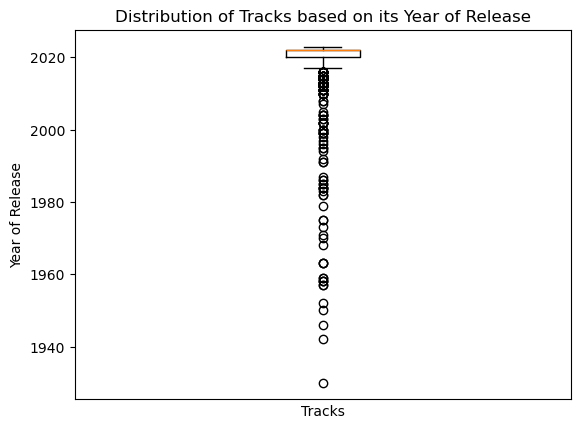

In [12]:
plt.title('Distribution of Tracks based on its Year of Release')
plt.xlabel('Tracks')
plt.ylabel('Year of Release')
plt.boxplot(df['released_year'])
plt.xticks([])

###### The observation is that the songs ranging from approximately year 2020 until the present tend to be the songs that are trending in 2023 as shown in the interquartile range of the box plot. We can also see a lot of outliers which appears to be released on approximately year 1920 until 2017.

###### Now we'll observe the distribution of the number of artists 

([], [])

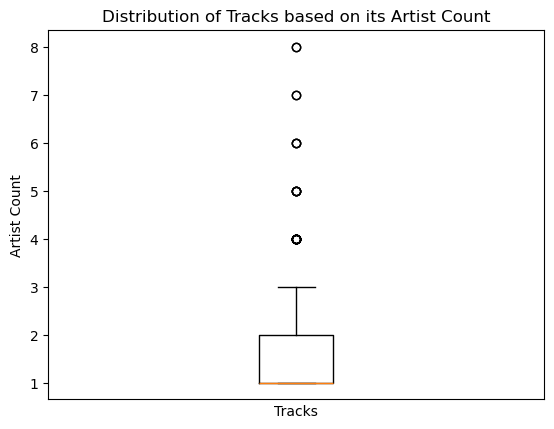

In [13]:
plt.title('Distribution of Tracks based on its Artist Count')
plt.xlabel('Tracks')
plt.ylabel('Artist Count')
plt.boxplot(df['artist_count'])
plt.xticks([])

###### It appears that the songs trending in 2023 tend to have 1 to 2 artists as shown in the interquartile range of the box plot. The outliers being 4 to 8 artists are also observed.

# C. Top Performers

###### Now that we're done with the analysis of basic descriptive statistics, let's proceed to the analysis of the top performers in Spotify 2023.

### a. Most Streamed Tracks

###### Let's observe the top 5 most streamed tracks of Spotify 2023

In [186]:
df['streams'].sort_values()

301                                            100409613
500                                           1007612429
515                                            101114984
744                                            101780047
366                                           1022258230
                             ...                        
455                                             98709329
253                                            988515741
625                                            991336132
33                                             999748277
574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, Length: 953, dtype: object

###### It looks like the streams have an object data type that's why it sorted the numbers as if it is a string. We can also see that in row 574 we have an abnormal data. Let's drop it, then we can convert the entire column of streams to an integer data type so that we can display the values from greatest to least.

In [3]:
df.drop([574], axis = 0, inplace = True)
df = df.astype({'streams': np.int64})

###### Also, from now on, let's set the streams as the index and arrange it so that it shows the most streamed tracks all the way down to the least streamed tracks of 2023. In this way, we can make our analysis later regarding correlations much easier.

In [4]:
df_stream_based = df.set_index('streams').sort_index(ascending = False)

In [235]:
df_stream_based.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,,,,,,,,,,,,,,,,,,,,,
3703895074,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,672,199,...,171,C#,Major,50,38,80,0,0,9,7
3562543890,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,33,0,...,96,C#,Minor,83,93,65,58,0,9,8
2887241814,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,440,125,...,110,C#,Major,50,45,41,75,0,11,3
2864791672,Dance Monkey,Tones and I,1,2019,5,10,24529,0,533,167,...,98,F#,Minor,82,54,59,69,0,18,10
2808096550,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,372,117,...,90,D,Major,76,91,50,54,0,7,5


###### We can see that the top 5 most streamed tracks of Spotify 2023 were: Blinding Lights by The Weeknd, Shape of You	by Ed Sheeran, Someone You Loved by Lewis Capaldi, Dance Monkey by Tones and I, and Sunflower - Spider-Man: Into the Spider-Verse by Post Malone and Swae Lee

### b. Most Frequent Artists

###### Now, let's visit the artists with the most appearances in Spotify 2023

In [115]:
df['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift          34
The Weeknd            22
Bad Bunny             19
SZA                   19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 644, dtype: int64

###### We can see above the top 5 most frequent artists which were: Taylor Swift with 34 tracks, The Weeknd with 22 tracks, Bad Bunny with 19 tracks, SZA with 19 tracks, and Harry Styles with 17 tracks. But that data may be inaccurate since it failed to consider factors such as collaborations. Their track count can still vary.

# D. Temporal Trends 

###### In this part, we'll observe if there are any trends based on a track's year of release or it's month of release.

### a. Trends Based on Year of Release

[Text(0.5, 0, 'Year of Release'),
 Text(0, 0.5, 'Track Count'),
 Text(0.5, 1.0, 'Relationship Between Year of Release and Track Count')]

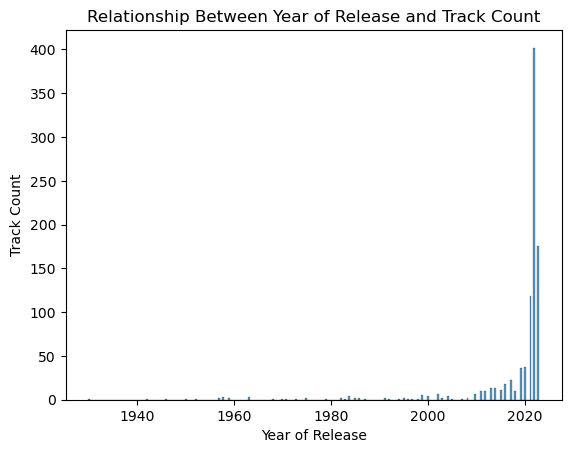

In [193]:
year_hist = sns.histplot(df['released_year'])
year_hist.set(xlabel = 'Year of Release', ylabel = 'Track Count', title = 'Relationship Between Year of Release and Track Count')

###### It is observable that the trending songs in Spotify 2023 are those tracks released on year 2020 onwards. 

### b. Trends Based on Month of Release

###### Now we'll observe if there is also a trend based on month of release.

[Text(0.5, 0, 'Month of Release'),
 Text(0, 0.5, 'Track Count'),
 Text(0.5, 1.0, 'Relationship between Month of Release and Track Count')]

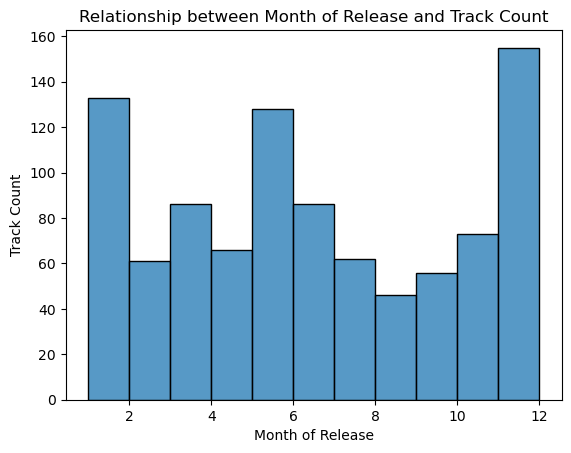

In [212]:
month_hist = sns.histplot(df['released_month'])
month_hist.set(xlabel = 'Month of Release', ylabel = 'Track Count', title = 'Relationship between Month of Release and Track Count')

###### We can observe that the trending tracks tend to be released at the start, middle, and most specially the end of the year. December is the month that sees the most releases. 

# E. Genre and Music Characteristics

###### This part of the analysis observes how musical characteristics or attributes influences the amount of streams a track gathers.

### a. Beats Per Minute

###### Beats per minute (BPM), also known as tempo, is a measurement of the speed or pace of music. It is a precise way to indicate the speed of a piece of music.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Beats Per Minute (BPM)'),
 Text(0.5, 1.0, 'Correlation Between Streams and BPM')]

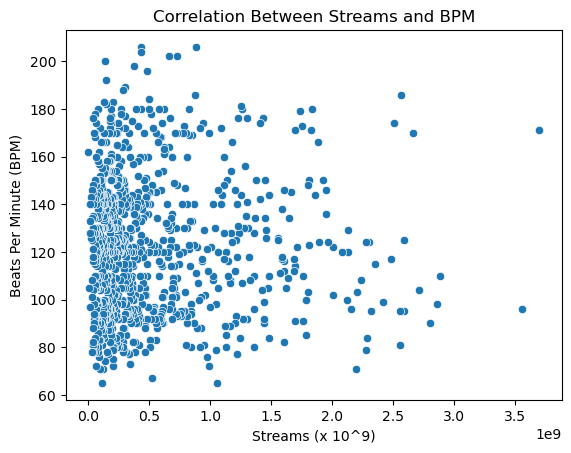

In [122]:
bpm_scatter = sns.scatterplot(df_stream_based['bpm'])
bpm_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Beats Per Minute (BPM)', title ='Correlation Between Streams and BPM')

###### We can observe that more trending tracks tend to stay between 80 bpm and 140 bpm. As the stream goes higher, we can still observe the even distribution of tracks between 80 bpm and 140 bpm. Therefore, we can conclude that people tend to like tracks with 80 bpm to 140 bpm that's why it gathers more stream.

### b. Danceability

###### Danceability is a measure of how suitable a song is for dancing.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Danceability (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Danceability')]

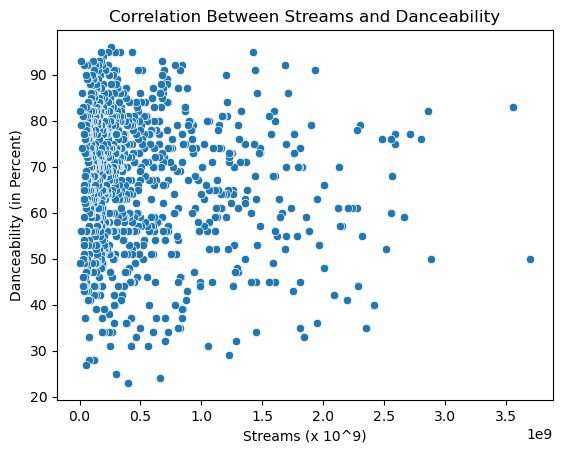

In [124]:
danceability_scatter = sns.scatterplot(df_stream_based['danceability_%'])
danceability_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Danceability (in Percent)', title ='Correlation Between Streams and Danceability')

###### It is observable that there is somehow a direct proportionality between streams and the danceability of the song. If we look into the plot as the number of streams go higher, the danceability also increases. This means that people tend to like tracks more that are suitable for dancing.

### c. Valence

###### Valence describes the musical positivity conveyed by a piece of music.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Valence (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Valence')]

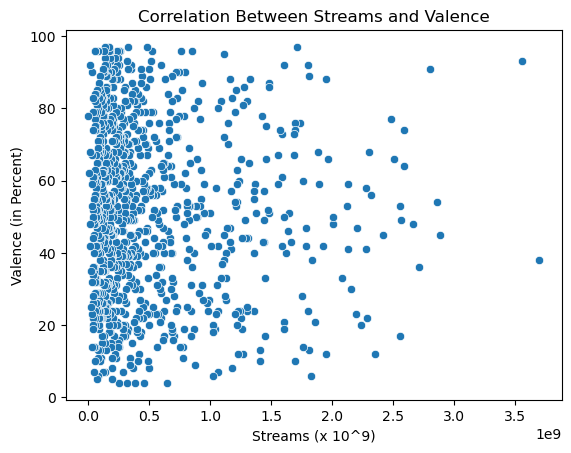

In [127]:
valence_scatter = sns.scatterplot(df_stream_based['valence_%'])
valence_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Valence (in Percent)', title ='Correlation Between Streams and Valence')

###### It appears that there is no correlation between valence and the amount of streams a track gathers since the plots are distributed evenly.

### d. Energy

###### Energy refers to the intensity and activity of a song

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Energy (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Energy')]

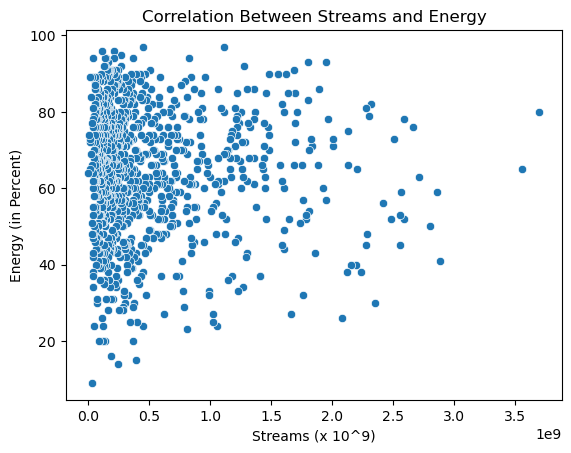

In [130]:
energy_scatter = sns.scatterplot(df_stream_based['energy_%'])
energy_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Energy (in Percent)', title ='Correlation Between Streams and Energy')

###### Just like danceability, energy is also directly proportional to the amount of streams a track gathers since if we look at the plots, as the stream increases, the energy also increases. 

### e. Acousticness

###### Acousticness is a numerical value that measures how acoustic a song is. Songs with higher acousticness are more likely to use acoustic and non-electronic instruments.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Acousticness (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Acousticness')]

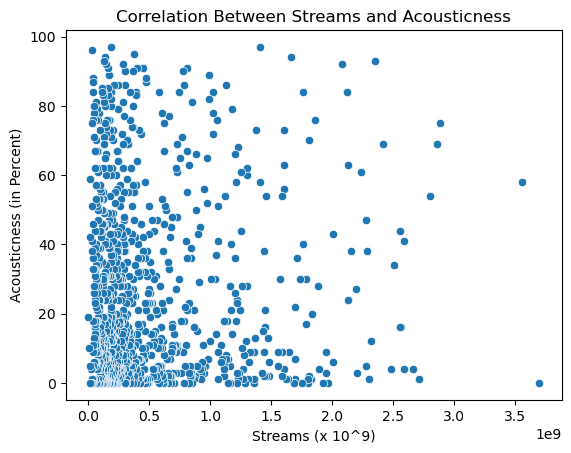

In [131]:
acousticness_scatter = sns.scatterplot(df_stream_based['acousticness_%'])
acousticness_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Acousticness (in Percent)', title ='Correlation Between Streams and Acousticness')

###### It seems that lower streamed tracks tend to have lower acousticness. But as the stream goes higher, there is no correlation between streams and acousticness anymore since the plots are now evenly distributed. Acousticness have no influence over the streams that a track may gather, it's just a lot of tracks nowadays have low acousticness.

### f. Instrumentalness

###### Instrumentalness predicts whether a track contains vocals. Songs with higher instrumentalness are less likely to have vocals.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Instrumentalness (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Instrumentalness')]

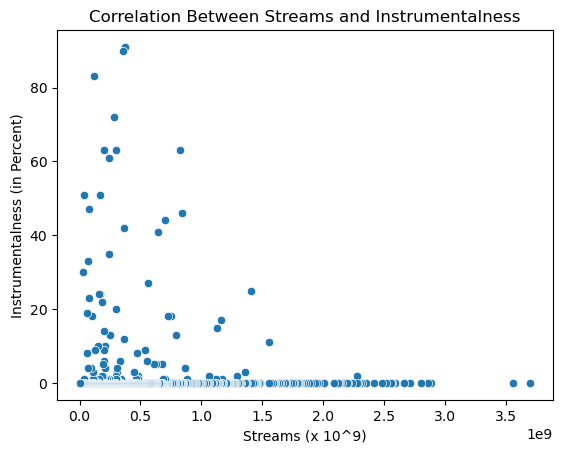

In [132]:
instrumentalness_scatter = sns.scatterplot(df_stream_based['instrumentalness_%'])
instrumentalness_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Instrumentalness (in Percent)', title ='Correlation Between Streams and Instrumentalness')

###### Tracks tend to have more streams if it has low instrumentalness. This means that people like music more if it is composed of vocals.

### g. Liveness

###### Liveness refers directly to reverberation time. 

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Liveness (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Liveness')]

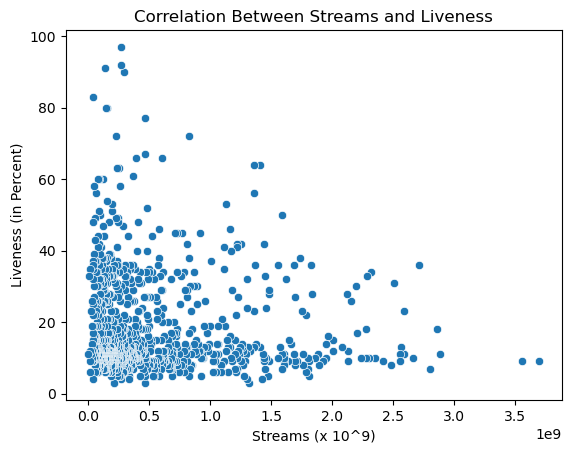

In [133]:
liveness_scatter = sns.scatterplot(df_stream_based['liveness_%'])
liveness_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Liveness (in Percent)', title ='Correlation Between Streams and Liveness')

###### From observation, a track seems to gather more streams the less its liveness is.

### h. Speechiness

###### Speechiness is a measure of how much spoken word is in a song, as opposed to sung vocal lyrics.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Speechiness (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Streams and Speechiness')]

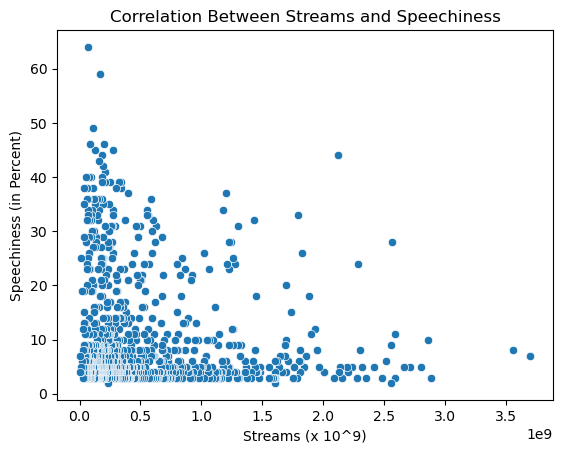

In [134]:
speechiness_scatter = sns.scatterplot(df_stream_based['speechiness_%'])
speechiness_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Speechiness (in Percent)', title ='Correlation Between Streams and Speechiness')

###### From observation, a track tend to gather more streams if its speechiness is around 5% to 10%. This means that people like a track more if its composed mostly of music, vocals, and a little amount of spoken words.

### i. Final Observations

#### 1. Most Influential Attribute

###### Based on the scatterplot, I can say that the most influential attribute in gathering popularity and streams are speechiness, liveness, and instrumentalness. This is due to the fact that the plots are easier to analyze which means that most tracks are in agreement when it comes to these attributes.

#### 2. Correlation Between Attributes

###### Earlier, we observed similar attributes having similar relationship with the streams such as energy and danceability both having direct correlationship, and valence and acousticness having no correlationship at all. Now let's plot these attributes against each other and see their correlationship with one another.

##### 2.1 Energy and Danceability

[Text(0.5, 0, 'Danceability (in Percent)'),
 Text(0, 0.5, 'Energy (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Energy and Danceability')]

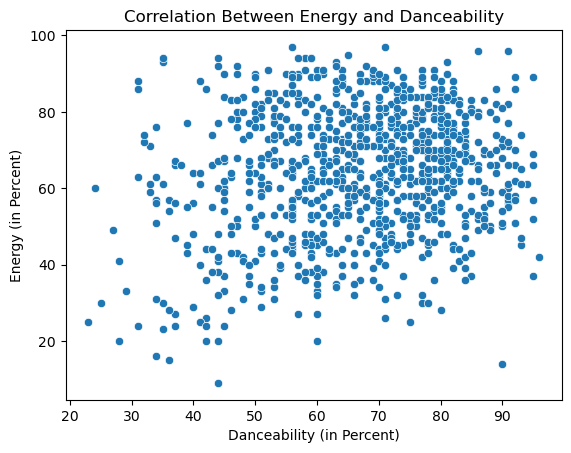

In [199]:
dance_energy_scatter = sns.scatterplot(data = df_stream_based, x = df_stream_based['danceability_%'], y = df_stream_based['energy_%'])
dance_energy_scatter.set(xlabel = 'Danceability (in Percent)', ylabel = 'Energy (in Percent)', title ='Correlation Between Energy and Danceability')

###### We can observe a direct relationship here where the higher the danceability is, the higher its energy will be. This makes sense since energy is the activity of the music. People commonly dance to music with high activity or intensity.

##### 2.2 Valence and Acousticness

###### Now, let's move on to valence and acousticness.

[Text(0.5, 0, 'Valence (in Percent)'),
 Text(0, 0.5, 'Acousticness (in Percent)'),
 Text(0.5, 1.0, 'Correlation Between Valence and Acousticness')]

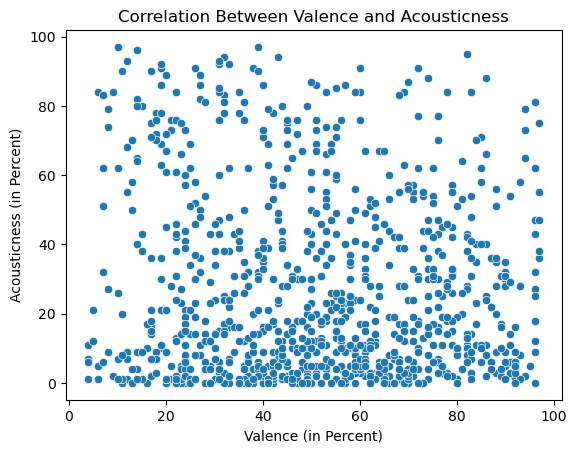

In [200]:
valence_acoustic_scatter = sns.scatterplot(data = df_stream_based, x = df_stream_based['valence_%'], y = df_stream_based['acousticness_%'])
valence_acoustic_scatter.set(xlabel = 'Valence (in Percent)', ylabel = 'Acousticness (in Percent)', title ='Correlation Between Valence and Acousticness')

###### Once again, there is no correlationship at all. We can observe that tracks are frequently occuring at 0 - 20% acousticness, but it is evenly spread from 0 - 100% valence. This tells us that an acoustic track can be conveyed positively or negatively. The same goes for a non-acoustic track

# F. Platform Popularity

###### In this part, we will analyze the popularity of these tracks in three platforms (Spotify, Apple, and Deezer) based on the visualization of our data.

### a. Spotify

#### 1. In Spotify Playlist

([], [])

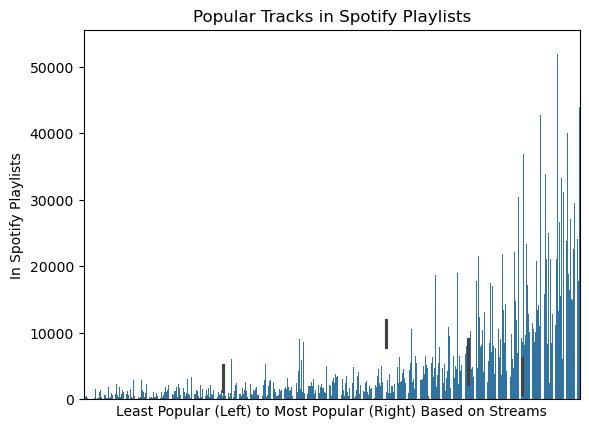

In [5]:
spoti_plist_scatter = sns.barplot(df_stream_based['in_spotify_playlists'])
spoti_plist_scatter.set(xlabel = 'Least Popular (Left) to Most Popular (Right) Based on Streams', ylabel = 'In Spotify Playlists', title ='Popular Tracks in Spotify Playlists')
plt.xticks([])

###### It is observable that the higher the popularity of the track, the higher amount of playlists it is in.

#### 2. In Spotify Charts

([], [])

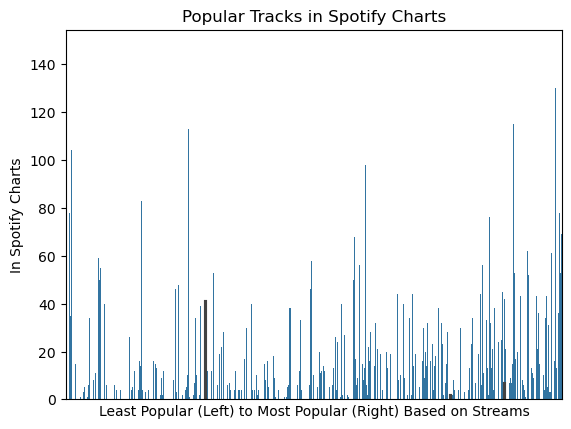

In [6]:
spoti_charts_scatter = sns.barplot(df_stream_based['in_spotify_charts'])
spoti_charts_scatter.set(xlabel = 'Least Popular (Left) to Most Popular (Right) Based on Streams', ylabel = 'In Spotify Charts', title ='Popular Tracks in Spotify Charts')
plt.xticks([])

###### However, a track's popularity based on streams doesn't necessarily have an impact on its chart rankings as seen in the bar graph.

### b. Apple

#### 1. In Apple Playlists

([], [])

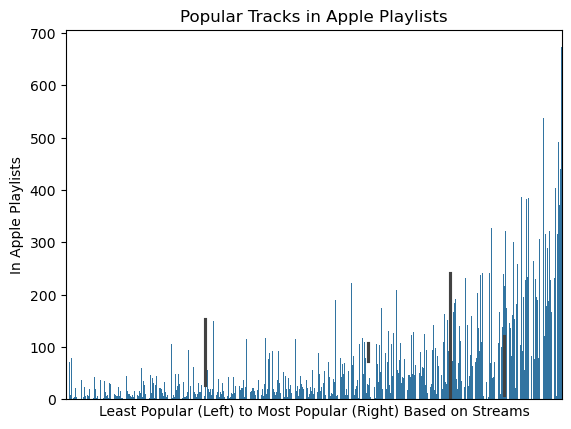

In [7]:
apple_plist_scatter = sns.barplot(df_stream_based['in_apple_playlists'])
apple_plist_scatter.set(xlabel = 'Least Popular (Left) to Most Popular (Right) Based on Streams', ylabel = 'In Apple Playlists', title ='Popular Tracks in Apple Playlists')
plt.xticks([])

###### Similar with the spotify platform, if a track has high popularity, then it is in a higher amount of playlists.

#### 2. In Apple Charts

([], [])

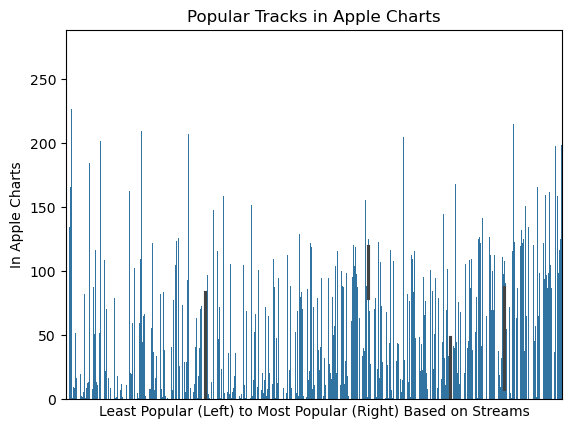

In [8]:
apple_charts_scatter = sns.barplot(df_stream_based['in_apple_charts'])
apple_charts_scatter.set(xlabel = 'Least Popular (Left) to Most Popular (Right) Based on Streams', ylabel = 'In Apple Charts', title ='Popular Tracks in Apple Charts')
plt.xticks([])

###### However, popularity doesn't necessarily guarantee that a track will rank high in apple charts.

### c. Deezer

#### 1. In Deezer Playlists

###### I've encountered multiple objects at this column and all of them have the same problem which is the comma between the numbers. That's why we used the replace function to remove the comma. This will enable us to convert the data type of the column from object to integer. 

([], [])

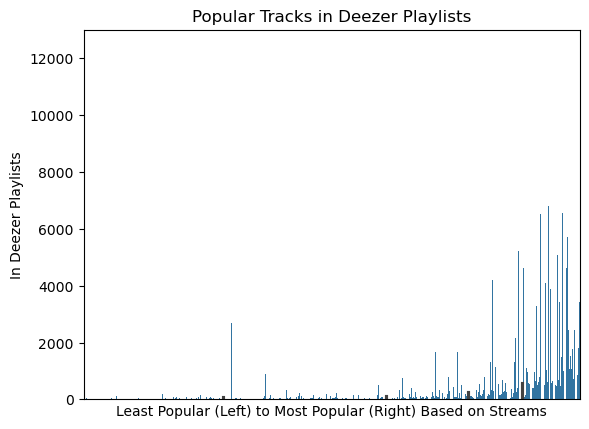

In [9]:
df_stream_based['in_deezer_playlists'] = df_stream_based['in_deezer_playlists'].replace({',': ''}, regex=True).astype({'in_deezer_playlists':np.int64})
deezer_plist_scatter = sns.barplot(df_stream_based['in_deezer_playlists'])
deezer_plist_scatter.set(xlabel = 'Least Popular (Left) to Most Popular (Right) Based on Streams', ylabel = 'In Deezer Playlists', title ='Popular Tracks in Deezer Playlists')
plt.xticks([])

###### Deezer also follows the same trend of the first two platforms. It is observable that the higher the popularity is, the higher amount of playlists a track is in.

#### 2. In Deezer Charts

([], [])

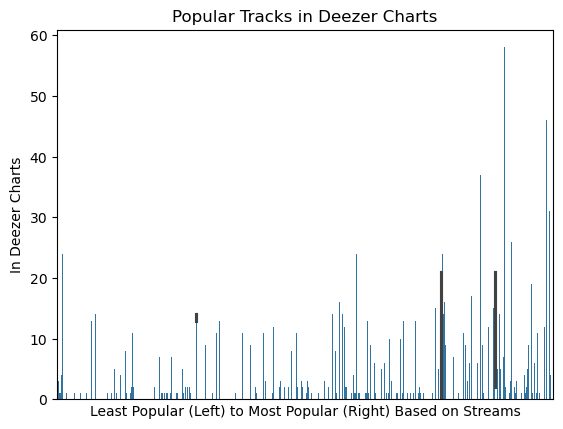

In [10]:
deezer_charts_scatter = sns.barplot(df_stream_based['in_deezer_charts'])
deezer_charts_scatter.set(xlabel = 'Least Popular (Left) to Most Popular (Right) Based on Streams', ylabel = 'In Deezer Charts', title ='Popular Tracks in Deezer Charts')
plt.xticks([])

###### However, popularity doesn't guarantee a high chart ranking just like the first two platforms. 

# G. Advanced Analysis

### a. Patterns Among Tracks with the Same Key or Mode

#### 1. Key

###### A key in music is a scale or group of pitches that forms the basis of a piece of music.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Key'),
 Text(0.5, 1.0, 'Correlation Between Streams and Key')]

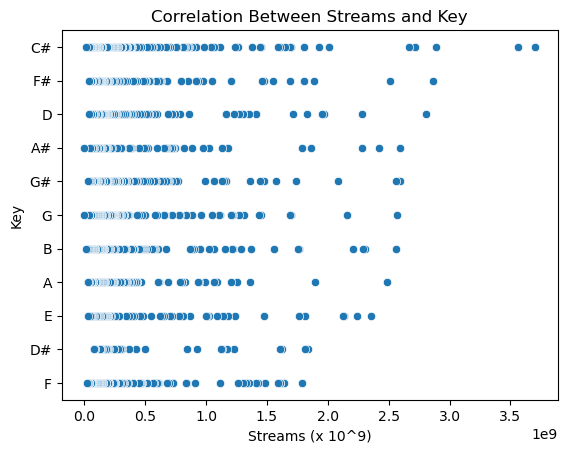

In [125]:
key_scatter = sns.scatterplot(df_stream_based['key'])
key_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Key', title ='Correlation Between Streams and Key')

###### There is a little difference but we can observe that sharp keys except D# tend to amass more streams.

In [139]:
df_stream_based['key'].value_counts()

key
C#    120
G      96
G#     91
F      89
D      81
B      81
A      74
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

###### Furthermore, we can observe that C# is actually the most commonly used key in music. 

#### 2. Mode

###### Mode is a type of musical scale coupled with a set of characteristic melodic and harmonic behaviors.

[Text(0.5, 0, 'Streams (x 10^9)'),
 Text(0, 0.5, 'Mode'),
 Text(0.5, 1.0, 'Correlation Between Streams and Mode')]

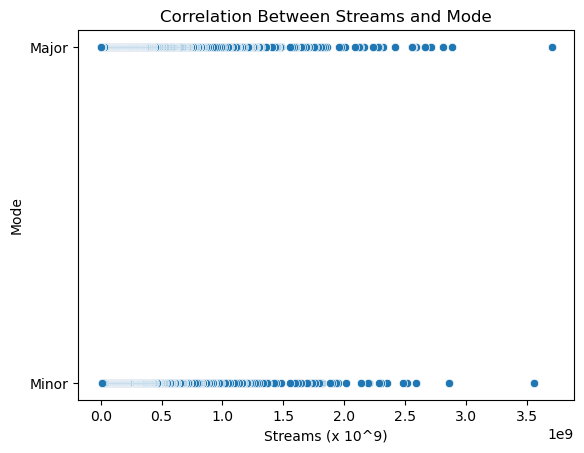

In [126]:
mode_scatter = sns.scatterplot(df_stream_based['mode'])
mode_scatter.set(xlabel = 'Streams (x 10^9)', ylabel = 'Mode', title ='Correlation Between Streams and Mode')

###### There is a little difference but major tend to get more streams than minor. The defining factor is the range between 2 to 3 billion streams, where more tracks have major mode than minor mode.

In [138]:
df_stream_based['mode'].value_counts()

mode
Major    549
Minor    403
Name: count, dtype: int64

###### Furthermore, major is also much commonly used in these tracks than minor, but only by a small margin.

### b. Most Frequently Appearing Artists in Playlists or Charts

###### All of these cells contain a block of code that eliminates any track that have 0 playlist or chart values.

#### 1. Spotify

In [19]:
spoti_plist = df_stream_based[df_stream_based['in_spotify_playlists'] != 0]
spoti_plist['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                            34
The Weeknd                              22
SZA                                     19
Bad Bunny                               19
Harry Styles                            17
                                        ..
Natanael Cano, Peso Pluma                1
Chris Brown, Rvssian, Rauw Alejandro     1
Childish Gambino                         1
Rï¿½ï                                    1
Carin Leon, Grupo Frontera               1
Name: count, Length: 644, dtype: int64

In [20]:
spoti_charts = df_stream_based[df_stream_based['in_spotify_charts'] != 0]
spoti_charts['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                  22
Bad Bunny                     12
Harry Styles                  10
The Weeknd                     8
Feid                           7
                              ..
Zion & Lennox                  1
RAYE, 070 Shake                1
Arcangel, Bad Bunny            1
Plan B                         1
Carin Leon, Grupo Frontera     1
Name: count, Length: 399, dtype: int64

#### 2. Apple 

In [21]:
apple_plist = df_stream_based[df_stream_based['in_apple_playlists'] != 0]
apple_plist['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                            34
The Weeknd                              20
Bad Bunny                               19
SZA                                     18
Harry Styles                            17
                                        ..
Chris Brown, Rvssian, Rauw Alejandro     1
Childish Gambino                         1
Rï¿½ï                                    1
Dean Martin                              1
Carin Leon, Grupo Frontera               1
Name: count, Length: 631, dtype: int64

In [22]:
apple_charts = df_stream_based[df_stream_based['in_apple_charts'] != 0]
apple_charts['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                         33
The Weeknd                           22
SZA                                  19
Bad Bunny                            19
Harry Styles                         17
                                     ..
Brray, Rauw Alejandro, Lyanno         1
Frank Sinatra, B. Swanson Quartet     1
Feid, Mora                            1
Tony Dize, Bad Bunny                  1
Carin Leon, Grupo Frontera            1
Name: count, Length: 580, dtype: int64

#### 3. Deezer

In [23]:
deezer_plist = df_stream_based[df_stream_based['in_deezer_playlists'] != 0]
deezer_plist['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                  33
The Weeknd                    22
Bad Bunny                     19
SZA                           18
Harry Styles                  17
                              ..
Childish Gambino               1
Rï¿½ï                          1
Dean Martin                    1
Kordhell                       1
Carin Leon, Grupo Frontera     1
Name: count, Length: 630, dtype: int64

In [24]:
deezer_charts = df_stream_based[df_stream_based['in_deezer_charts'] != 0]
deezer_charts['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift                  13
Bad Bunny                      8
NewJeans                       5
Feid                           5
The Weeknd                     4
                              ..
Meghan Trainor                 1
Charlie Puth                   1
Robin Schulz, Oliver Tree      1
Fifty Fifty                    1
Carin Leon, Grupo Frontera     1
Name: count, Length: 310, dtype: int64

#### 4. Final Observation

###### From observation, the most frequently appearing artists in all of these platform's playlists and charts are Taylor Swift, The Weeknd, Bad Bunny, SZA, and Harry Styles.